# Assignment 3

In [4]:
# Assignment 3 (15 september)
# Perform Data preprocessing on Titanic dataset
# 1.Data Collection.
#    Please download the dataset from
#    https://www.kaggle.com/datasets/yasserh/titanic-dataset
# 2.Data Preprocessing
#     o   Import the Libraries.
#     o   Importing the dataset.
#     o   Checking for Null Values.
#     o   Data Visualization.
#     o   Outlier Detection
#     o   Splitting Dependent and Independent variables
#     o   Perform Encoding
#     o   Feature Scaling.
#     o   Splitting Data into Train and Test

# Import the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing the dataset

In [6]:
dataset = pd.read_csv("/content/Titanic-Dataset.csv")

# Checking for Null Values

In [7]:
null_values = dataset.isnull().sum()

# Data Visualization

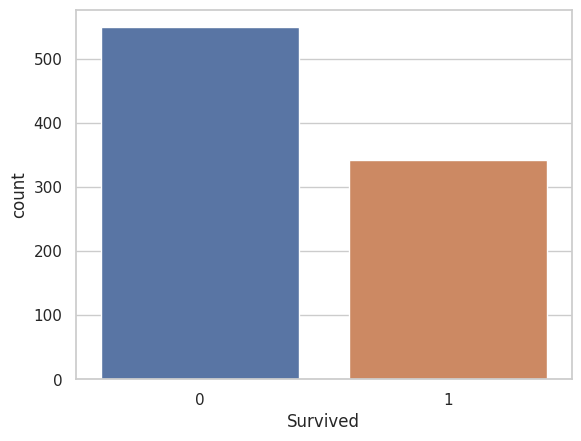

In [8]:
sns.set(style="whitegrid")
sns.countplot(x="Survived", data=dataset)
plt.show()

# Outlier Detection

In [9]:
numerical_columns = ['Age', 'Fare']
z_scores = np.abs((dataset[numerical_columns] - dataset[numerical_columns].mean()) / dataset[numerical_columns].std())
threshold = 3
outlier_mask = z_scores > threshold
outliers = dataset[outlier_mask.any(axis=1)]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
630          631         1       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   
851          852         0       3   

                                                  Name     Sex   Age  SibSp  \
27           

# Splitting Dependent and Independent variables

In [10]:
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

# Exclude non-numeric columns from X

In [11]:
X_numeric = X.select_dtypes(include=[np.number])

# Perform Encoding (Example: Label Encoding for Sex column)

In [12]:
label_encoder = LabelEncoder()
X["Sex"] = label_encoder.fit_transform(X["Sex"])

# Feature Scaling (Example: Standardization)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Splitting Data into Train and Test

Number of samples in the test dataset: 179
Basic statistics of the test dataset:
Mean: [-0.03455655 -0.10193644         nan -0.1095822   0.01175234 -0.03059938]
Standard Deviation: [1.00937639 1.04720501        nan 0.6611409  1.06847731 0.79204588]
Minimum: [-1.71066854 -1.56610693         nan -0.4745452  -0.47367361 -0.64842165]
Maximum: [1.72622007 0.82737724        nan 3.15480905 5.73284383 4.6344169 ]


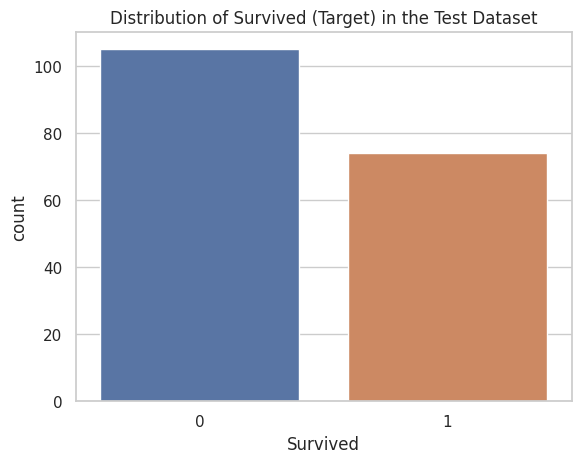

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Number of samples in the test dataset:", len(X_test))
print("Basic statistics of the test dataset:")
print("Mean:", np.mean(X_test, axis=0))
print("Standard Deviation:", np.std(X_test, axis=0))
print("Minimum:", np.min(X_test, axis=0))
print("Maximum:", np.max(X_test, axis=0))
sns.countplot(x=y_test)
plt.title("Distribution of Survived (Target) in the Test Dataset")
plt.show()